In [59]:
import pandas as pd
import numpy as np

# dataset contains latin characters, use latin char-set
df = pd.read_csv('datasets/Spotify.csv', na_filter=False,  encoding='latin-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 8 columns):
ID                  2980 non-null object
Name                2980 non-null object
Energy              2980 non-null float64
Loudness            2980 non-null float64
Speechiness         2980 non-null float64
Instrumentalness    2980 non-null float64
Type                2980 non-null object
time_signature      2980 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 186.4+ KB


__Task 1.1. Data Preparation for Clustering__
1. Can you identify data quality issues in this dataset such as unusual data
types, missing values and others?

Some duplicate songs, same ID

All audio features have same attribute

Some songs have invalid time signature of 0



In [60]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

#drop useless column
del df['Type']

# remove rows with invalid time signature
df = df[df.time_signature != 0]

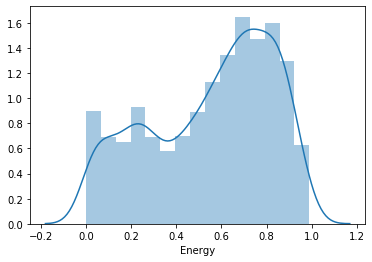

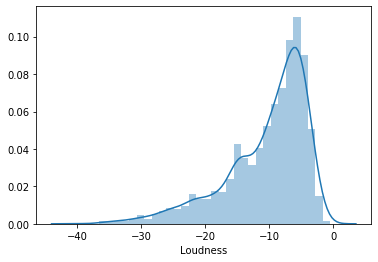

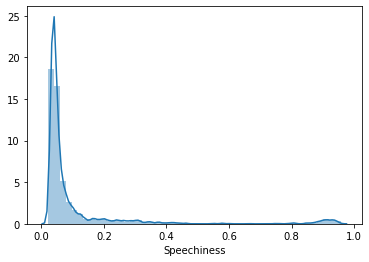

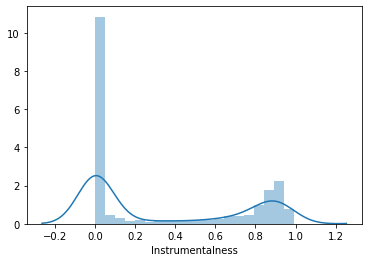

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

energy_dist = sns.distplot(df['Energy'].dropna())
plt.show()


loudness_dist = sns.distplot(df['Loudness'].dropna())
plt.show()

speech_dist = sns.distplot(df['Speechiness'].dropna())
plt.show()

instrum_dist = sns.distplot(df['Instrumentalness'].dropna(), bins=20)
plt.show()

rows before:  2685
rows after:  2685


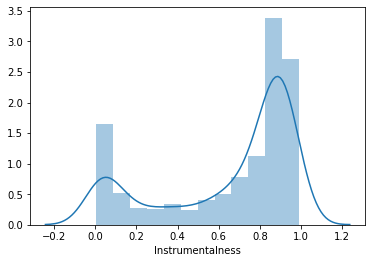

In [56]:
# CLEAN Up large outliers + 0
import numpy as np

mask = df['Instrumentalness'] <= 0.005
df.loc[mask, 'Instrumentalness'] = np.nan
df.Instrumentalness.fillna(df.Instrumentalness.mode(), inplace=True)
instrum_dist = sns.distplot(df['Instrumentalness'].dropna())
plt.show()

2. What variables did you include in the analysis and what were their roles and
measurement level set? Justify your choice.

Energy, Loudness, Instrumentalness, Speechiness

__Task 1.2. The first clustering model__
1. Build a default clustering model with K= 3 and answer the followings:


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# use selected features
df2 = df[['Energy', 'Loudness', 'Speechiness', 'Instrumentalness']]

X = df2.values

X = StandardScaler().fit_transform(X)

rs = 10 # random state
k = 3# num of clusters

model = KMeans( n_clusters=k, random_state=rs ).fit(X)

print("\nsum of intra-cluster distance: ", model.inertia_ )

print("\nCentroid locations: ")
for centroid in model.cluster_centers_:
    print(centroid)

from collections import Counter, defaultdict
print("\n", Counter(model.labels_))


sum of intra-cluster distance:  3583.334837103983

Centroid locations: 
[-1.13445957 -1.1365255  -0.22089152  1.19013138]
[ 0.57072778  0.54430976 -0.16933934 -0.48311448]
[-1.08142314 -0.62585552  4.46299819 -0.79216197]

 Counter({1: 1784, 0: 794, 2: 107})


##### a. How many records are assigned into each cluster?
 Counter({0: 1784, 1: 794, 2: 107})
 


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

y = model.predict(X)
df2['Cluster_ID'] = y

# How many records are in each cluster
print ("Cluster membership")
print( df2['Cluster_ID'].value_counts() )

Cluster membership
1    1784
0     794
2     107
Name: Cluster_ID, dtype: int64


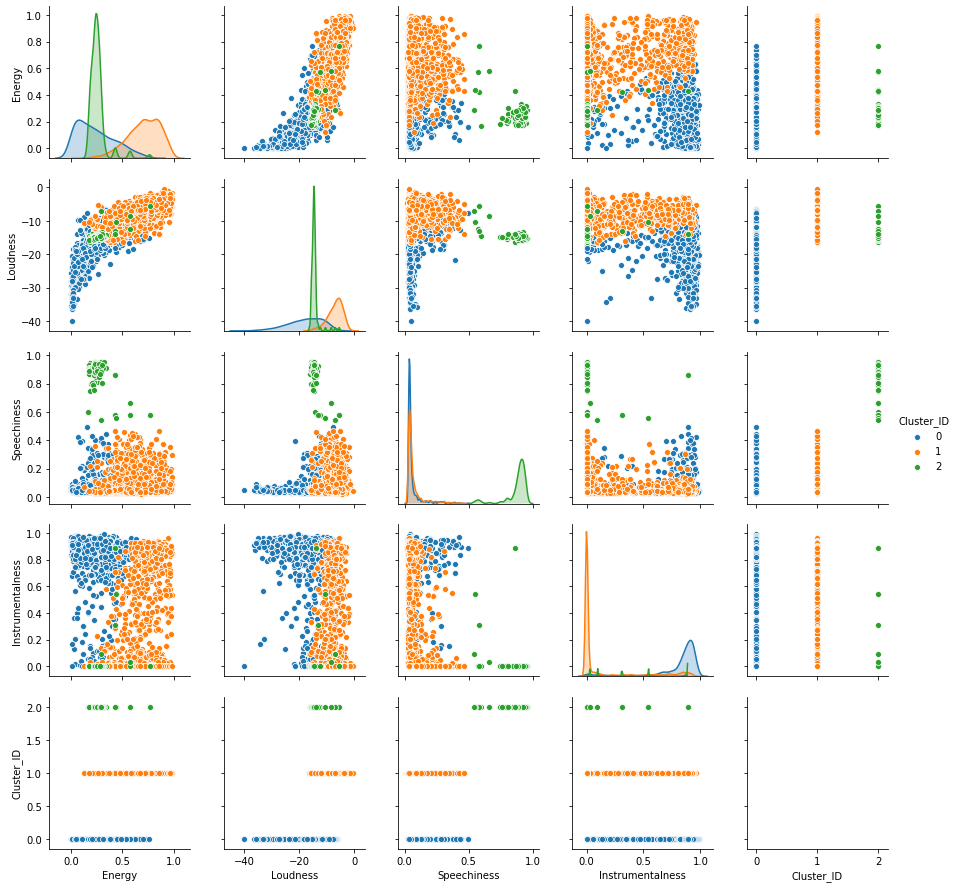

In [65]:
# pairplot the cluster distribution
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()


b. Plot the cluster distribution using pairplot. Explain key characteristics
of each cluster/ segment.

2. What is the effect of using the standardization method on the model above?
Does the variable normalization process enable a better clustering solution?

3. Interpret the (best out of the above two models) cluster analysis outcome. In
other words, characterize the nature of each cluster by giving it a descriptive
label by using distplot.

## Task 1.3

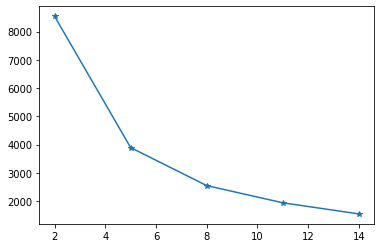

In [80]:
# list to save the clusters and cost
clusters = []
inertia_vals = []
# this whole process should take a while
for k in range(2, 17, 3):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

plt.plot(range(2,17,3), inertia_vals, marker='*')
plt.show()

In [82]:
# 5 or 8
from sklearn.metrics import silhouette_score

print(clusters[1])
print("score for k=5: ", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("score for k=8: ", silhouette_score(X, clusters[2].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)
score for k=5:  0.4471510833908115
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)
score for k=8:  0.39146071152239403
